# The $k$-nearest neighbors (KNN, $k$-NN) algorithm

Authors:

Joseph Salmon, Alexandre Gramfort, Claire Vernade, Mathurin Massias

Delort-Laval Tristan 
Guigon Hippolyte 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.base import BaseEstimator, ClassifierMixin
from scipy import stats
from sklearn import neighbors
from sklearn import datasets
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA


from tp_knn_source import (rand_gauss, rand_bi_gauss, rand_tri_gauss,
                           rand_checkers, rand_clown, plot_2d, ErrorCurve,
                           frontiere_new, LOOCurve)


import seaborn as sns
from matplotlib import rc

plt.close('all')
rc('font', **{'family': 'sans-serif', 'sans-serif': ['Computer Modern Roman']})
params = {'axes.labelsize': 12,
          'font.size': 16,
          'legend.fontsize': 16,
          'text.usetex': False,
          'figure.figsize': (8, 6)}
plt.rcParams.update(params)

sns.set_context("poster")
sns.set_palette("colorblind")
sns.set_style("white")
_ = sns.axes_style()

## Data generation

In [2]:
np.random.seed(42)  # fix seed globally

n = 100
mu = [4, 5]
sigma = [0.3, 0.5]
rand_gauss(n, mu, sigma)

n1 = 20
n2 = 20
X1, y1 = rand_bi_gauss()

mu1, mu2, mu3 = [4, 5], [7, 2], [2, 9] 
sigma1, sigma2, sigma3 = [0.3, 0.5], [0.2, 0.4],[0.3, 0.6]

n1 = 50
n2 = 50
n3 = 50
X2, y2 = rand_tri_gauss()

sigma = 2
n1 = 50
n2 = 50

X3, y3 = rand_checkers()

n1 = 150
n2 = 150
X4, y4 = rand_clown()

• The rand_bi gauss function output is a n1 + n2 row size and 2 column size vector of two normal random variables with respective parameters mu1, mu2 and sigma1, sigma2, order is shuffled. The last columns shows from which law the result comes from

• The rand_tri gauss function output is a n1 + n2 + n3 row size and 2 column size vector with results of 3 normal random variables with respective parameters mu1 sigma1, mu2 sigma2, mu3 sigma3 which order is shuffled. Last column shows from which of the three law comes the result

• The rand_clown function output is a n1 + n2 row size and 2 column size vector which each row equal to the result of one of the two normal law plus a noise corresponding to its standard deviation. Last column shows from which of the two normal laws the result is taken from 

• The rand_checker function output is a n1 + n2 multiple of 8 row size and 2 size column vector with the noise taken from the standard deviation of each law. Last column shows from which law the result comes from

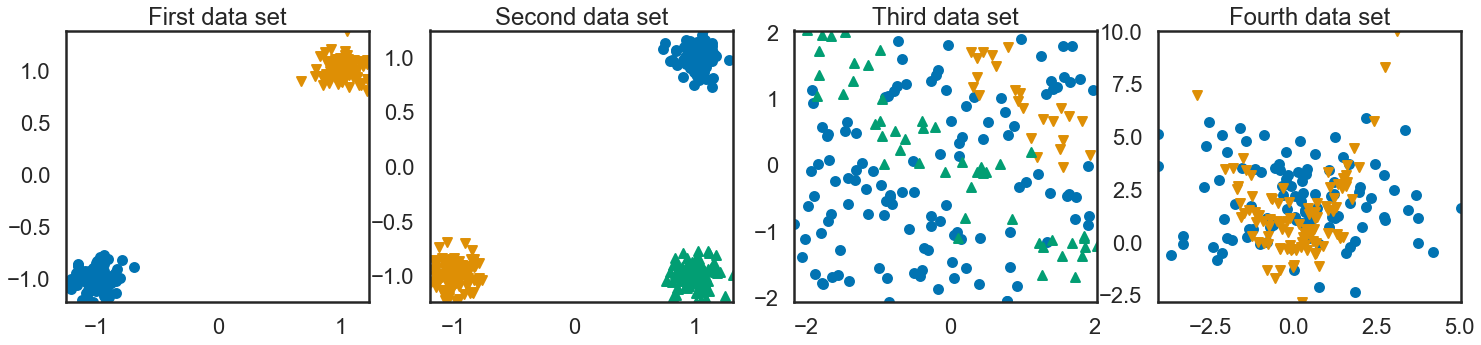

In [3]:
############################################################################
#     Displaying labeled data
############################################################################


plt.show()
plt.close("all")
plt.ion()
plt.figure(4, figsize=(25, 5))
plt.subplot(141)
plt.title('First data set')
plot_2d(X1, y1)

plt.subplot(142)
plt.title('Second data set')
plot_2d(X2, y2);

plt.subplot(143)
plt.title('Third data set')
plot_2d(X3, y3);

plt.subplot(144)
plt.title('Fourth data set')
plot_2d(X4, y4);
# todo plot,
# todo other datasets on other subplots

## The $k$-NN algorithm

In [4]:
#Question 3

from sklearn.metrics.pairwise import euclidean_distances
from sklearn.neighbors import NearestNeighbors

class KNNClassifier(BaseEstimator, ClassifierMixin):
    """ Home made KNN Classifier class"""
    def __init__(self, n_neighbors=1):
        self.n_neighbors = n_neighbors

    def fit(self, X, y):
        self.X_ = X
        self.y_ = y
        return self

    def predict(self, X):
        n_samples, n_features = X.shape
        dist = euclidean_distances(X, self.X_)
        index = np.argsort(dist, axis=1)
        neigbor_index = index[:, :self.n_neighbors]
        y_neighbors = self.y_[neigbor_index]
        mode, y_neighbors = stats.mode(y_neighbors, axis=1)
        y_pred = np.asarray(mode.ravel(), dtype=np.intp)
        return y_pred

X_train = X2[::2]
Y_train = y2[::2]
X_test = X2[1::2]
Y_test = y2[1::2]

n_neighbors = 1
knn = KNNClassifier(n_neighbors=n_neighbors)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)

from sklearn.neighbors import KNeighborsClassifier

sknn = KNeighborsClassifier(n_neighbors=n_neighbors)
sknn.fit(X_train, Y_train)
Y_pred_skl = sknn.predict(X_test)

print("The scikit-learn algorith and KNN Classifier lead to same result : {}".format(np.allclose(Y_pred, Y_pred_skl)))

The scikit-learn algorith and KNN Classifier lead to same result : True


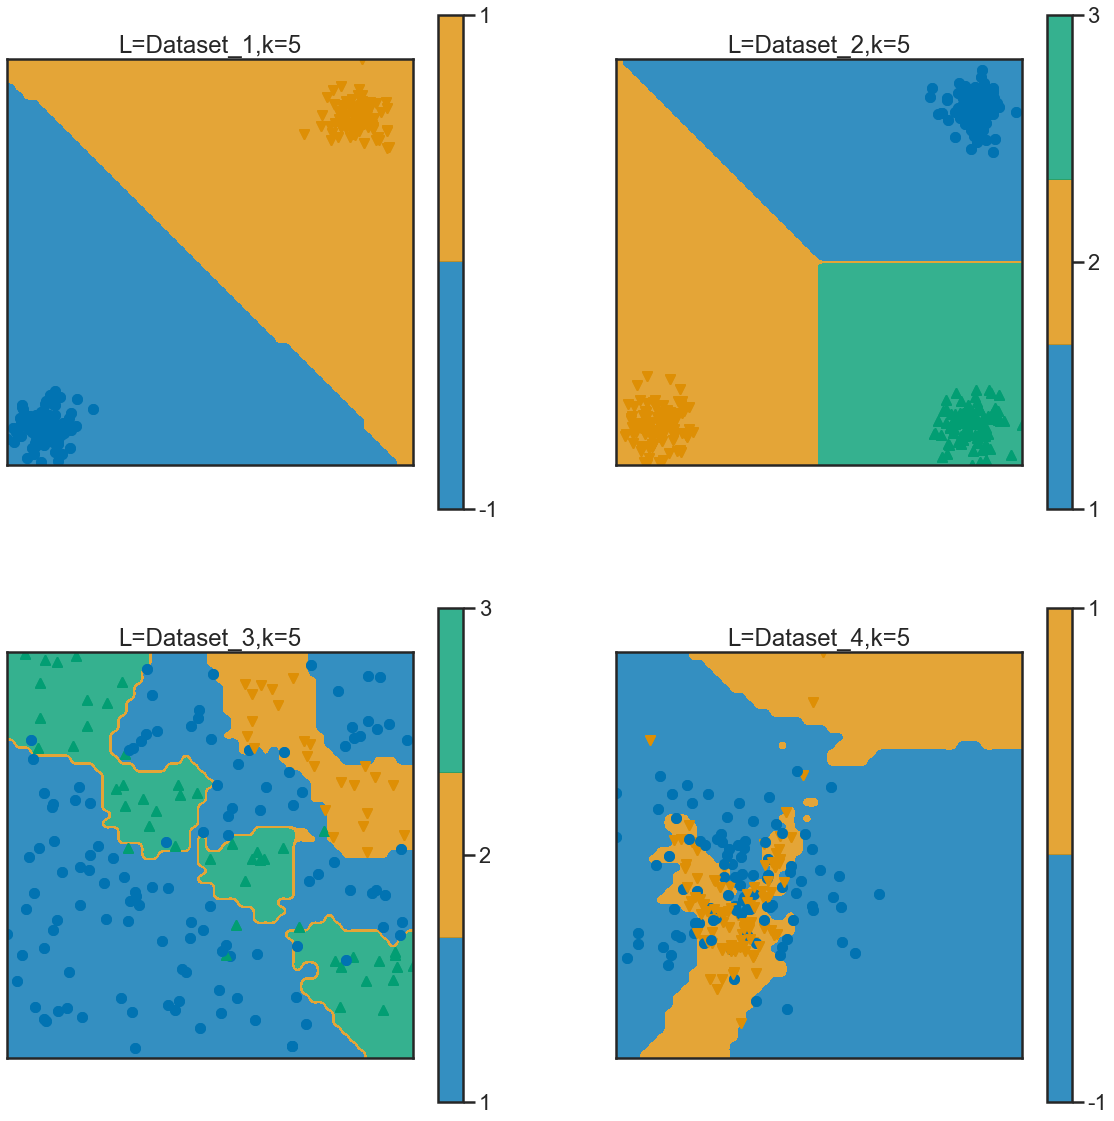

In [5]:
# Q3 : test now all datasets

n_neighbors = 5  
knn = neighbors.KNeighborsClassifier

X = [X1, X2, X3, X4]
Y = [y1, y2, y3, y4]
n_labels = ["Dataset_1", "Dataset_2", "Dataset_3", "Dataset_4"]
count = 0

plt.figure(figsize=(20, 20))

for i, j in zip(X, Y):
    plt.subplot(2,2,count+1)
    knn = KNNClassifier(n_neighbors=n_neighbors)
    knn.fit(i, j)
    plot_2d(i, j)
    frontiere_new(knn, i, j, w=None, step=50, alpha_choice=1, n_labels=n_labels[count], n_neighbors=n_neighbors)
    count += 1
plt.show()

'When k = 1, decisions frontier reveal the position of each group very accurately. When k = n, only one group \nis represented. The decision frontier is simple when k is extreme, equal to n'

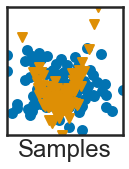

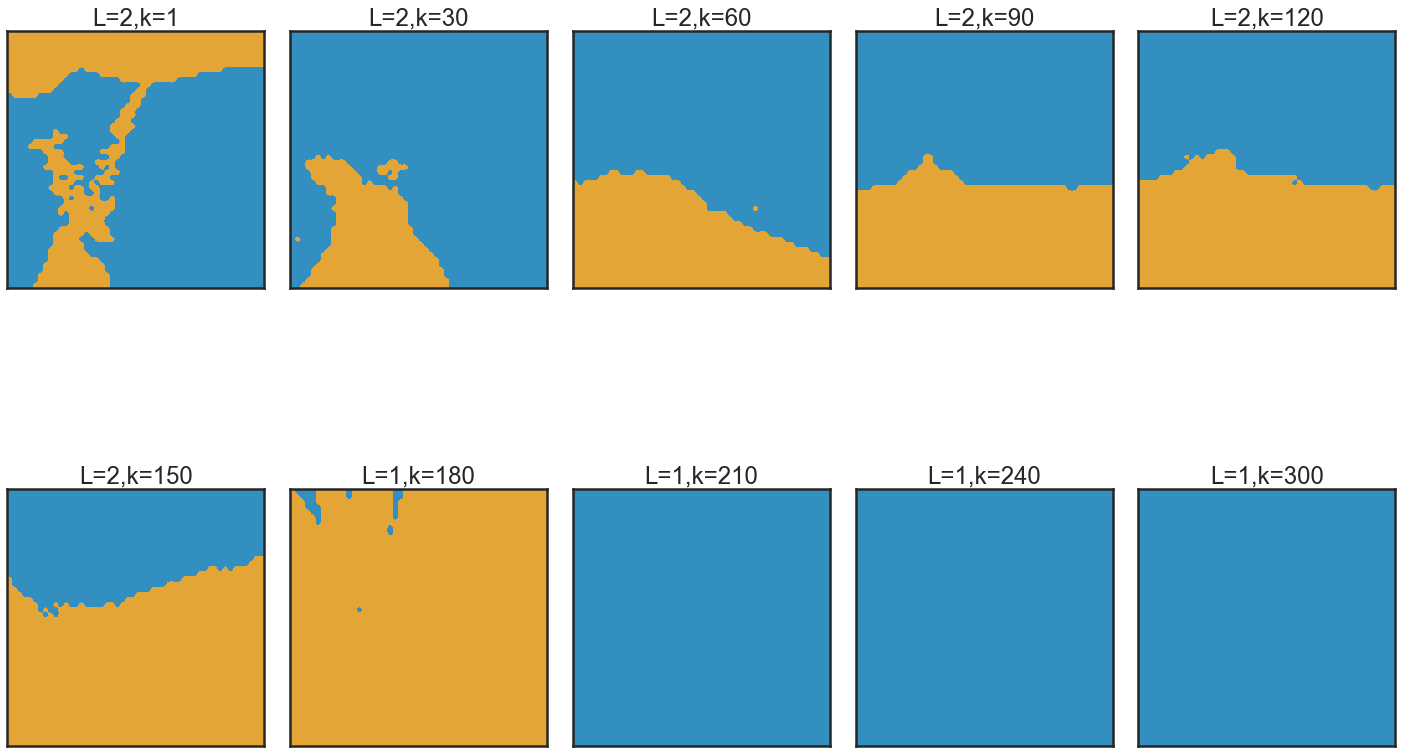

In [6]:
# Display the predictions when varying the value of k


X_train = X4
Y_train = y4

plt.figure(3, figsize=(12, 8))
plt.subplot(3, 5, 3)
plot_2d(X_train, Y_train)
plt.xlabel('Samples')
ax = plt.gca()
ax.get_yaxis().set_ticks([])
ax.get_xaxis().set_ticks([])

length = [X1.shape, X2.shape, X3.shape, X4.shape]

liste = [1, 30, 60, 90, 120, 150, 180, 210, 240, X2.shape[0]]

plt.figure(figsize=(20, 20))
for i, n_neighbors in enumerate(liste):
    knn = KNNClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train, Y_train)
    y_pred = knn.predict(X_train)
    L = np.unique(y_pred)
    plt.subplot(3, 5, 5 + i + 1)
    frontiere_new(knn, X_train, Y_train, w=None, step=50, alpha_choice=1, n_neighbors=n_neighbors, n_labels=len(L),
                  colorbar=False, samples=False)
    plt.draw()

plt.tight_layout()

"""When k = 1, decisions frontier reveal the position of each group very accurately. When k = n, only one group 
is represented. The decision frontier is simple when k is extreme, equal to n"""

In [7]:
# Q5 : Scores on train data

#We'll experiment with Dataset 3 

X_train = X3[::2]
Y_train = y3[::2]
X_test = X3[1::2]
Y_test = y3[1::2]

n_neighbors = 1

knn = KNNClassifier(n_neighbors=n_neighbors)
knn.fit(X_train, Y_train)
y_pred = knn.predict(X_train)
print("The fraction of errors on training data for k = {} is {}".format(n_neighbors, 1 - knn.score(X_train, Y_train)))

print("\n")
knn.fit(X_train, Y_train)
y_pred = knn.predict(X_test)
print("The fraction of errors on testing data for k = {} is {:.3f}".format(n_neighbors, 1 - knn.score(X_test, Y_test)))

The fraction of errors on training data for k = 1 is 0.0


The fraction of errors on testing data for k = 1 is 0.167


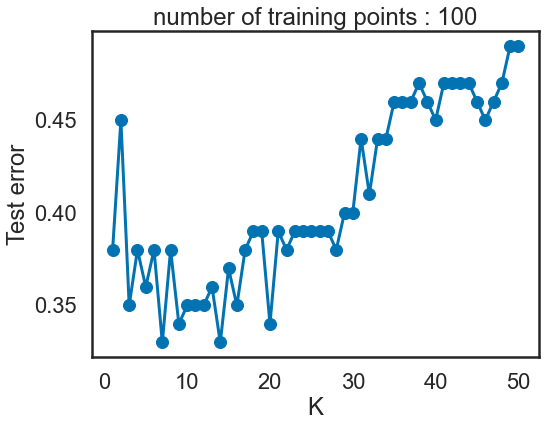

In [8]:
# Q6 : Scores on left out data

n1 = n2 = 200
sigma = 0.1
data4 = rand_checkers(2 * n1, 2 * n2, sigma)

X_train = X4[::2]
Y_train = y4[::2].astype(int)
X_test = X4[1::2]
Y_test = y4[1::2].astype(int)

k_range = range(1, 51)

error_curve = ErrorCurve(k_range)

error_curve.fit_curve(X_train, Y_train, X_test, Y_test)
error_curve.plot()

<Figure size 576x432 with 0 Axes>

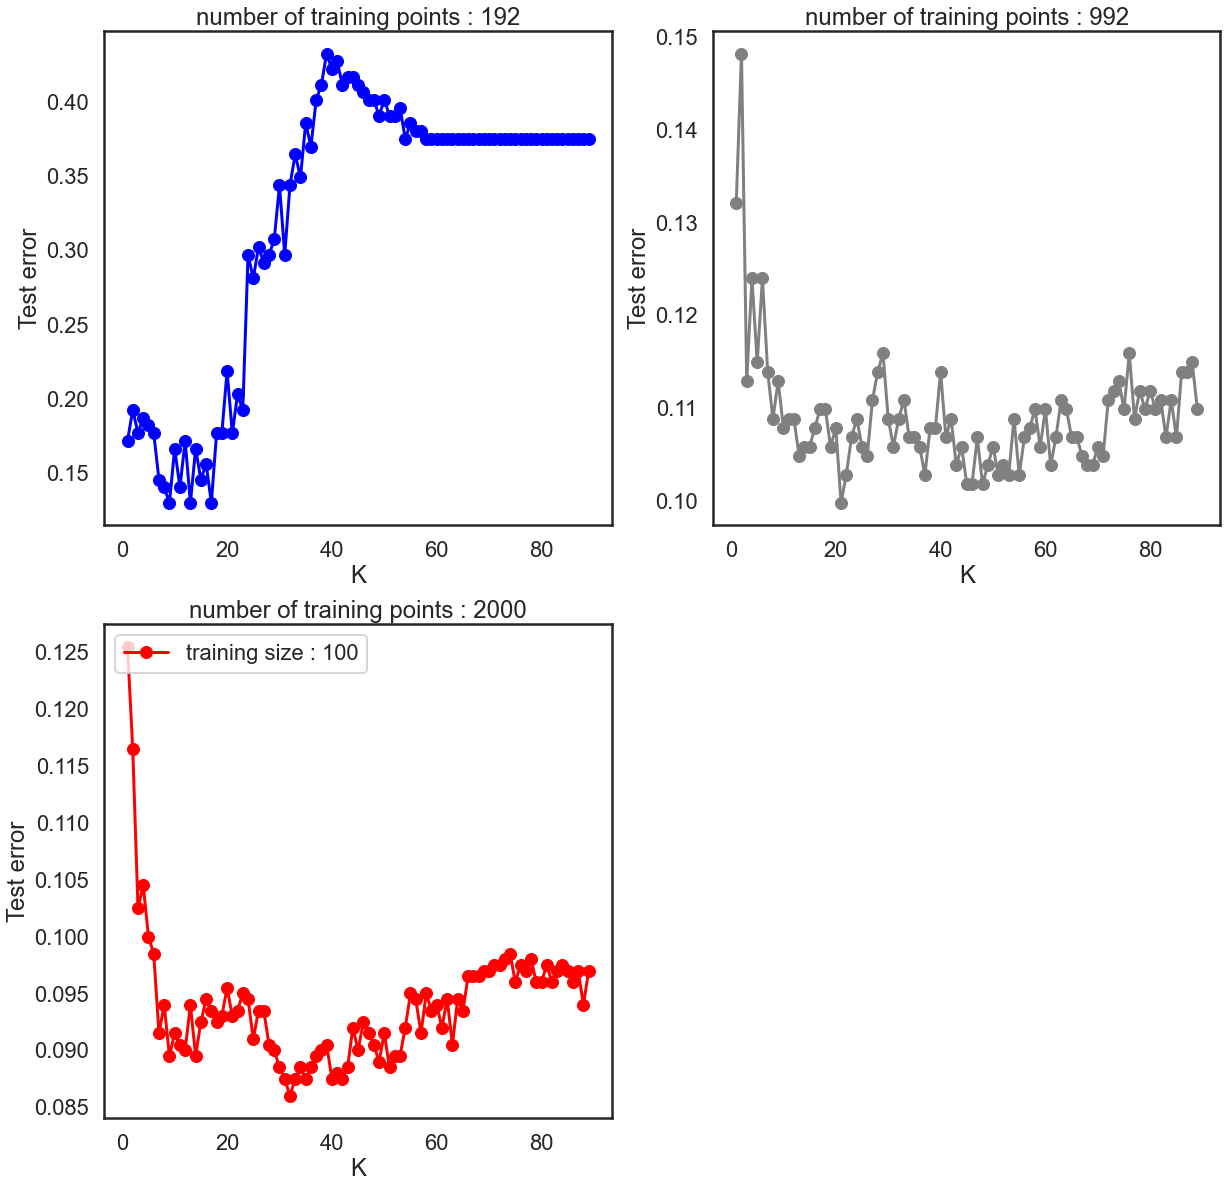

In [9]:
#Question 6

collist = ['blue', 'grey', 'red', 'purple', 'orange', 'salmon', 'black',
           'fuchsia']

sigma = 0.1
plt.figure(5)
range_n_samples = [100, 500, 1000]
niter = len(range_n_samples)

plt.figure(figsize=(20, 20));

for i, n in enumerate(range(niter)):
    n1 = n2 = range_n_samples[n]
    X_train, Y_train = rand_checkers(n1, n2, sigma)
    X_test, Y_test = rand_checkers(n1, n2, sigma)
    plt.subplot(2,2, i + 1);
    error_curve = ErrorCurve(range(1, 90))
    error_curve.fit_curve(X_train, Y_train, X_test, Y_test)
    error_curve.plot(c = collist[i]);

plt.legend(["training size : %d" % n for n in range_n_samples],

           loc='upper left');

In [10]:
from sklearn.neighbors import KNeighborsClassifier
import time

time1 = time.time()

min_datasets = []
k_min = []

dict = {}

A = []
#len(X_train) -1
for k in range(1, 90):
    knn = KNNClassifier(n_neighbors=k)
    knn.fit(X_train, Y_train)
    A.append(round(1-knn.score(X_test, Y_test), 5))
k_min.append(A.index(min(A)) +1 )
min_datasets.append(min(A))

print("The minimum of the Error curve is {:.3f} reached for k = {}".format(min_datasets[0], k_min[0]))
print("\n")
print("As the dictionnary shows, best k is not the same for all Datasets")
print("\n")

X_train = [X1[::2], X2[::2], X3[::2]]
Y_train = [y1[::2], y2[::2], y3[::2]]
X_test = [X1[1::2], X2[1::2], X3[1::2]]
Y_test = [y1[1::2], y2[1::2], y3[1::2]]
label = ["Dataset 1", "Dataset 2", "Dataset 3"]

min_datasets = []
k_min = []

dict = {}

for i, j, l, m in zip(X_train, Y_train, X_test, Y_test):
    A = []
    for k in range(1, 80):
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(i, j)
        A.append(1-knn.score(l, m))
    k_min.append(A.index(min(A)) +1 )
    min_datasets.append(min(A))
    
for i in range(len(label)):
    dict[label[i]] = (k_min[i], min_datasets[i])


print(dict)

time2 = time.time()

print(time2 - time1)

The minimum of the Error curve is 0.086 reached for k = 32


As the dictionnary shows, best k is not the same for all Datasets


{'Dataset 1': (1, 0.0), 'Dataset 2': (1, 0.0), 'Dataset 3': (1, 0.16666666666666663)}
27.441446781158447


What are the pros and cons of this classifier ?

The cons are:
-It is very time consuming 

### Application to the DIGITS dataset

<class 'sklearn.utils.Bunch'>
Score for k = 1 the score is : 0.967
Score for k = 6 the score is : 0.956
Score for k = 11 the score is : 0.935
Score for k = 16 the score is : 0.919
Score for k = 21 the score is : 0.913
Score for k = 26 the score is : 0.901
Score for k = 31 the score is : 0.896
Score for k = 36 the score is : 0.885
Score for k = 41 the score is : 0.876
Score for k = 46 the score is : 0.868


Accuracy is a decreasing function of k


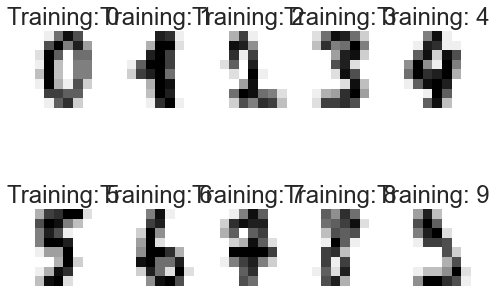

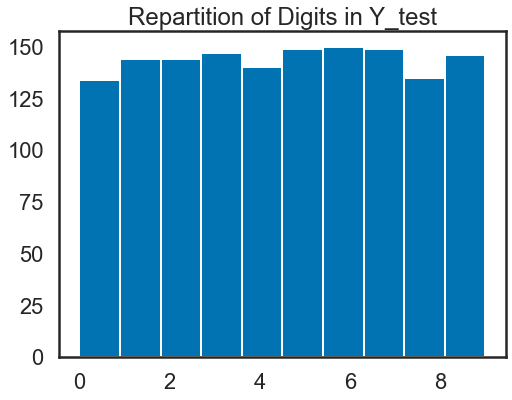

In [11]:
#Question 8

from sklearn.model_selection import train_test_split

digits = datasets.load_digits()

print(type(digits))

for idx, (img, lbl) in enumerate(list(zip(digits.images, digits.target))[10:20]):
    plt.subplot(2, 5, idx + 1)
    plt.axis('off')
    plt.imshow(img, cmap=plt.cm.gray_r, interpolation='None')
    plt.title('Training: %i' % lbl)

n_samples = len(digits.data)

X_train, X_test, Y_train, Y_test = train_test_split(digits.data, digits.target, test_size=0.8, random_state=42)

k_range = range(1, 50, 5)

for k in k_range:
    knn = KNNClassifier(n_neighbors=k)
    knn.fit(X_train, Y_train)
    Y_pred = knn.predict(X_test)
    print("Score for k = {} the score is : {:.3f}".format(k, knn.score(X_test, Y_test)))

print("\n")
print("Accuracy is a decreasing function of k")


plt.figure()

plt.title("Repartition of Digits in Y_test")
plt.hist(Y_test);
plt.show();

[[134   0   0   0   0   0   0   0   0   0]
 [  0 103  15   1   0   0   5   0  17   3]
 [  1   5 121   6   0   0   1   1   9   0]
 [  1   0   2 133   0   1   0   3   6   1]
 [  2   2   0   0 131   0   0   4   1   0]
 [  3   0   0   3   1 121   4   0   0  17]
 [  5   1   0   0   0   0 144   0   0   0]
 [  0   3   0   0   0   0   0 141   5   0]
 [  1   6   1   6   0   2   3   0 115   1]
 [  5  10   0  14   0   3   0   7   2 105]]


<Figure size 1440x1440 with 0 Axes>

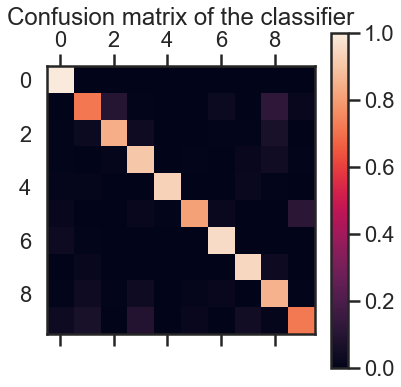

In [12]:
# Compute confusion matrix

from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(Y_test, Y_pred)
print(conf_mat);

conf_mat_normalized = conf_mat / conf_mat.sum(axis = 1);

plt.figure(figsize=(20, 20));
plt.matshow(conf_mat_normalized);
plt.title('Confusion matrix of the classifier')
plt.colorbar();

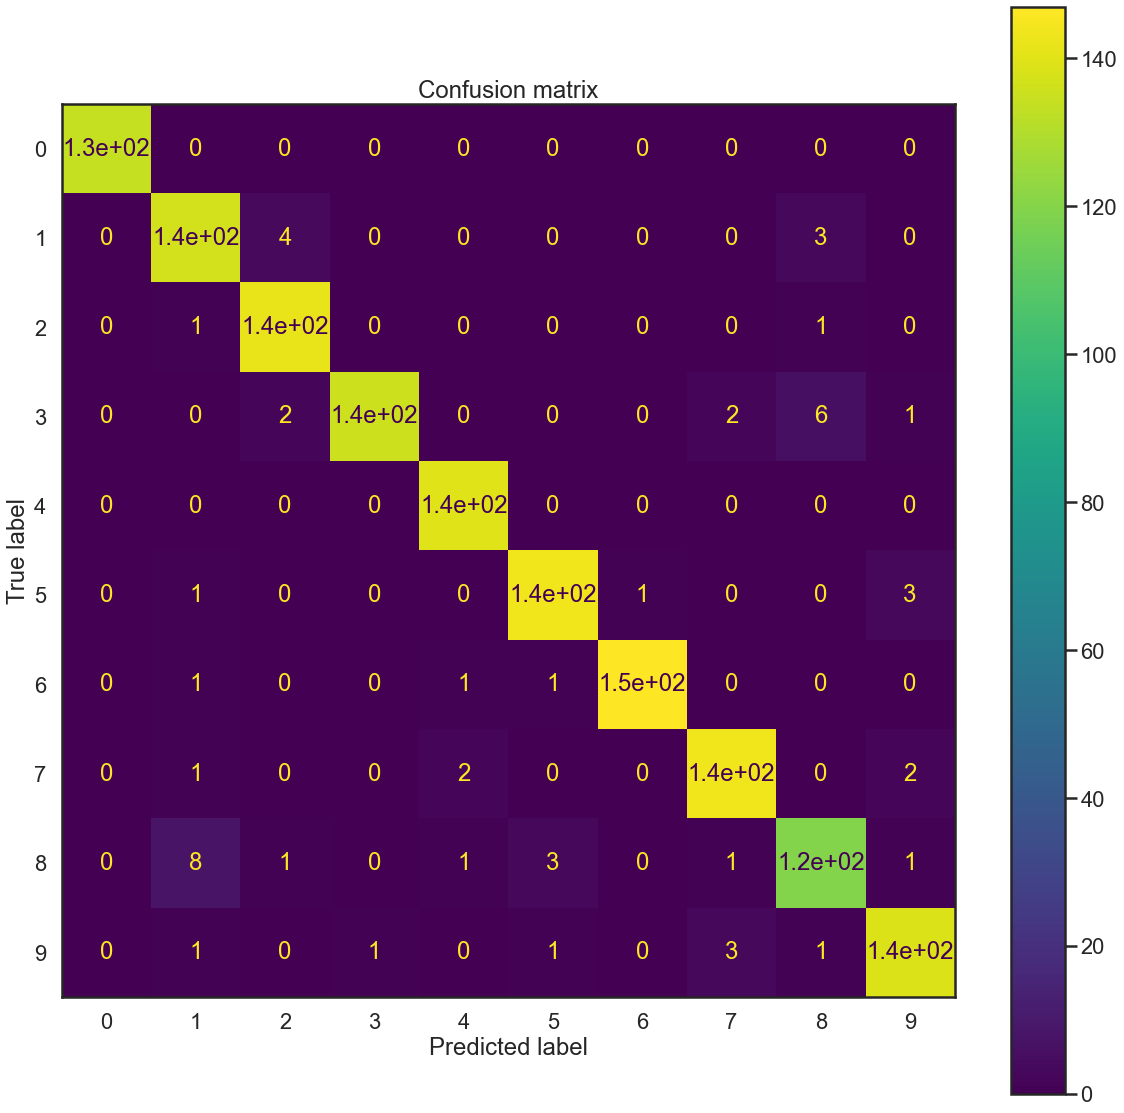

In [13]:
from sklearn.metrics import plot_confusion_matrix
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split

fig, ax = plt.subplots(figsize=(20, 20))
classifier = svm.SVC(kernel='linear', C=0.01).fit(X_train, Y_train)
plot_confusion_matrix(classifier, X_test, Y_test, ax=ax)
plt.title('Confusion matrix');

[0.96995828 0.95504172 0.96196106 0.95684979 0.95591099 0.9511822
 0.94808762 0.94561892 0.94203755 0.94054242 0.93591794 0.93417942
 0.93066759 0.92823366 0.92489569 0.92360918 0.92030598 0.91867177
 0.91609875 0.91328234 0.91147427 0.90910987 0.90768428 0.90552851
 0.90257302 0.90073018 0.89888734 0.89808762 0.89621001 0.8949235
 0.89193324 0.88998609 0.88744784 0.88553547 0.88494437 0.88310153
 0.88063282 0.87844228 0.87586926 0.87357441 0.87173157 0.87023644
 0.86714186 0.8650904  0.86363004 0.86223922 0.86053547 0.85914465
 0.85667594 0.85417246]


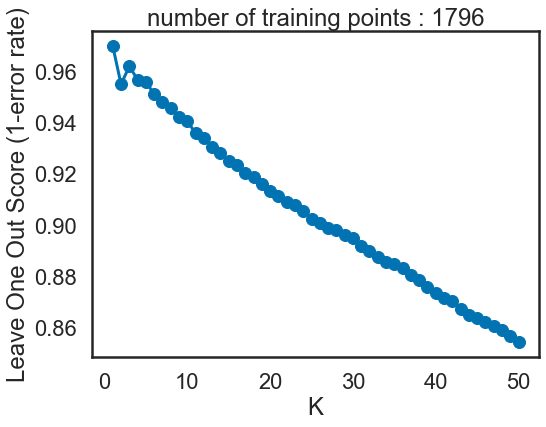

In [14]:
# Q10 : Estimate k with cross-validation

# Have a look at the class  'LOOCurve', defined in the source file.

loo_curv = LOOCurve(k_range=range(1, 51))
loo_curv.fit_curve(X=digits.data, y=digits.target)

plt.close(9)
plt.figure(9)

print(loo_curv.cv_scores)
loo_curv.plot()

### Weighted $k$-NN classifier

In [15]:
# Implement weights for the kNN classifier


def weights(dist):
    global h
    weight = np.array([np.exp(-dist**2/h)])
    return weight

class WKNNClassifier(BaseEstimator, ClassifierMixin):
    """ Home made KNN Classifier class"""
    def __init__(self, n_neighbors=1, weights=''):
        self.n_neighbors = n_neighbors
        self.weights = weights

    def fit(self, X, y):
        self.X_ = X
        self.y_ = y
        return self

    def predict(self, X):
        n_samples, n_features = X.shape
        dist = euclidean_distances(X, self.X_)
        dist = self.weights(dist)
        index = np.argsort(dist, axis=1)
        neigbor_index = index[:, :self.n_neighbors]
        y_neighbors = self.y_[neigbor_index]
        mode, y_neighbors = stats.mode(y_neighbors, axis=1)
        y_pred = np.asarray(mode.ravel(), dtype=np.intp)
        return y_pred

X_train = X3[::2]
Y_train = y3[::2]
X_test = X3[1::2]
Y_test = y3[1::2]
n_neighbors = 5

h = 1
wknn = WKNNClassifier(n_neighbors=n_neighbors, weights=weights)
wknn.fit(X_train, Y_train)
print(wknn.predict(X_test))


from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=n_neighbors, weights=weights)
knn.fit(X_train, Y_train)
knn.predict(X_test)

#plt.figure(4)
#plot_2d(X_train, Y_train)
#frontiere_new(wknn, X_train, Y_train, w=None, step=50, alpha_choice=1)

[3 1 3 1 3 3 2 1 1 3 3 3 2 3 1 3 1 1 3 1 3 3 1 3 3 1 1 3 2 3 3 3 3 3 1 1 3
 1 3 1 1 3 3 1 1 1 3 1 1 3 3 2 1 3 1 3 3 3 3 3 1 2 3 2 3 3 1 3 2 1 1 3 1 3
 1 3 1 3 3 3 1 1 1 2 3 2 3 3 1 1 1 1 3 1 1 3]


array([3., 2., 1., 1., 3., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 3., 1.,
       1., 1., 1., 3., 2., 1., 3., 3., 1., 1., 3., 1., 1., 1., 3., 3., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 3., 3., 3.,
       1., 2., 2., 1., 2., 1., 3., 2., 1., 1., 1., 1., 1., 1., 1., 3., 1.,
       3., 1., 1., 1., 1., 1., 1., 3., 1., 1., 1., 3., 1., 2., 1., 1., 1.,
       1., 1., 1., 2., 1., 3., 2., 2., 2., 1., 1.])